In [2]:
import pandas as pd
# Load the new dataset
file_path_data7 = 'data7.csv'
data7 = pd.read_csv(file_path_data7)
data7_original=data7
# Load the label mappings file
label_mappings = {
    "wx_phrase": {
        "Cloudy": 0, "Cloudy / Windy": 1, "Fair": 2, "Fog": 3, "Haze": 4, "Heavy Rain": 5,
        "Heavy Rain Shower": 6, "Heavy Rain Shower / Windy": 7, "Heavy T-Storm": 8, "Heavy T-Storm / Windy": 9,
        "Light Rain": 10, "Light Rain / Windy": 11, "Light Rain Shower": 12, "Light Rain Shower / Windy": 13,
        "Light Rain with Thunder": 14, "Mist": 15, "Mostly Cloudy": 16, "Mostly Cloudy / Windy": 17,
        "Partly Cloudy": 18, "Partly Cloudy / Windy": 19, "Rain": 20, "Rain Shower": 21, "Rain Shower / Windy": 22,
        "Showers in the Vicinity": 23, "Smoke": 24, "Squalls": 25, "T-Storm": 26, "T-Storm / Windy": 27,
        "Thunder": 28, "Thunder in the Vicinity": 29
    },
    "wdir_cardinal": {
        "CALM": 0, "E": 1, "ENE": 2, "ESE": 3, "N": 4, "NE": 5, "NNE": 6, "NNW": 7, "NW": 8, "S": 9, "SE": 10,
        "SSE": 11, "SSW": 12, "SW": 13, "VAR": 14, "W": 15, "WNW": 16, "WSW": 17, "nan": 18
    },
    "uv_desc": {
        "Extreme": 0, "High": 1, "Low": 2, "Moderate": 3, "Very High": 4, "nan": 5
    },
    "clds": {
        "BKN": 0, "CLR": 1, "FEW": 2, "OVC": 3, "SCT": 4
    }
}

inverse_label_mappings = {
    "wx_phrase": {v: k for k, v in label_mappings['wx_phrase'].items()},
    "wdir_cardinal": {v: k for k, v in label_mappings['wdir_cardinal'].items()},
    "uv_desc": {v: k for k, v in label_mappings['uv_desc'].items()},
    "clds": {v: k for k, v in label_mappings['clds'].items()}
}
# Apply the label mappings to the new dataset
data7_original['wx_phrase'] = data7_original['wx_phrase'].replace(inverse_label_mappings['wx_phrase'])
data7_original['wdir_cardinal'] = data7_original['wdir_cardinal'].replace(inverse_label_mappings['wdir_cardinal'])
data7_original['uv_desc'] = data7_original['uv_desc'].replace(inverse_label_mappings['uv_desc'])
data7_original['clds'] = data7_original['clds'].replace(inverse_label_mappings['clds'])

# # Display basic information about the processed dataset
data7_info = data7_original.info()
data7_description = data7_original.describe()

data7_original, data7_info, data7_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77750 entries, 0 to 77749
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DateTime       77750 non-null  object 
 1   temp           77738 non-null  float64
 2   wx_phrase      77750 non-null  object 
 3   dewPt          77732 non-null  float64
 4   heat_index     77732 non-null  float64
 5   rh             77732 non-null  float64
 6   pressure       77721 non-null  float64
 7   vis            77750 non-null  float64
 8   wc             77733 non-null  float64
 9   wdir_cardinal  77750 non-null  object 
 10  wspd           77744 non-null  float64
 11  uv_desc        77750 non-null  object 
 12  feels_like     77732 non-null  float64
 13  uv_index       77722 non-null  float64
 14  clds           77750 non-null  object 
dtypes: float64(10), object(5)
memory usage: 8.9+ MB


(                   DateTime  temp      wx_phrase  dewPt  heat_index    rh  \
 0       2020-01-01  0:00:00  79.0           Fair   66.0        81.0  65.0   
 1       2020-01-01  0:30:00  79.0           Fair   68.0        81.0  69.0   
 2       2020-01-01  1:00:00  79.0           Fair   70.0        81.0  74.0   
 3       2020-01-01  1:30:00  79.0           Fair   70.0        81.0  74.0   
 4       2020-01-01  2:00:00  77.0           Fair   68.0        79.0  74.0   
 ...                     ...   ...            ...    ...         ...   ...   
 77745  2024-06-17  21:30:00  84.0  Partly Cloudy   81.0        98.0  89.0   
 77746  2024-06-17  22:00:00  84.0  Partly Cloudy   81.0        98.0  89.0   
 77747  2024-06-17  22:30:00  84.0  Partly Cloudy   81.0        98.0  89.0   
 77748  2024-06-17  23:00:00  82.0  Partly Cloudy   81.0        94.0  94.0   
 77749  2024-06-17  23:30:00  82.0  Partly Cloudy   81.0        94.0  94.0   
 
        pressure  vis    wc wdir_cardinal  wspd uv_desc  feels

In [3]:
data7 = pd.read_csv(file_path_data7)

In [4]:
# Let's first check the unique values in the columns that need mapping to understand the discrepancy
unique_wx_phrase = data7['wx_phrase'].unique()
unique_wdir_cardinal = data7['wdir_cardinal'].unique()
unique_uv_desc = data7['uv_desc'].unique()
unique_clds = data7['clds'].unique()

unique_wx_phrase, unique_wdir_cardinal, unique_uv_desc, unique_clds


(array([ 2, 18, 16, 12,  4,  3, 10, 21, 29, 28, 14,  8, 26,  0, 23, 27,  6,
         9,  7,  1, 20, 13,  5, 19, 17, 22, 24, 11, 15, 25], dtype=int64),
 array([ 5, 14,  4,  6,  2, 11,  9,  0,  7,  3,  1, 17, 13, 12, 10, 15,  8,
        16, 18], dtype=int64),
 array([2, 3, 1, 4, 0, 5], dtype=int64),
 array([2, 4, 1, 0, 3], dtype=int64))

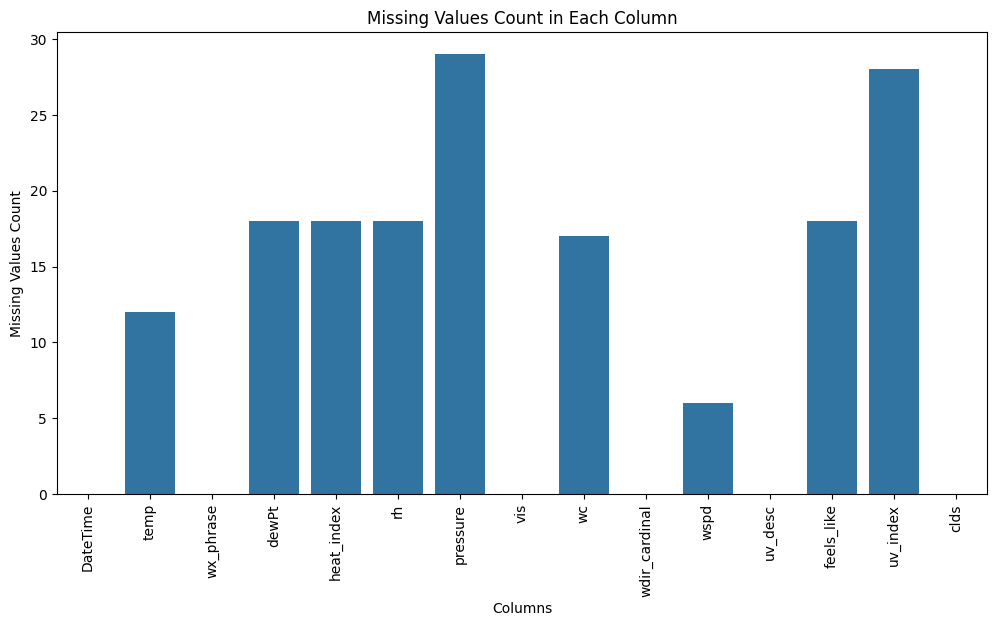

DateTime          0
temp             12
wx_phrase         0
dewPt            18
heat_index       18
rh               18
pressure         29
vis               0
wc               17
wdir_cardinal     0
wspd              6
uv_desc           0
feels_like       18
uv_index         28
clds              0
dtype: int64

In [5]:
# Check for missing values in the corrected dataset
import matplotlib.pyplot as plt
import seaborn as sns

missing_values_corrected = data7.isnull().sum()

# Plot missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_corrected.index, y=missing_values_corrected.values)
plt.xticks(rotation=90)
plt.title("Missing Values Count in Each Column")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.show()

# Display the missing values to the user
missing_values_corrected



In [6]:
# Impute missing values using the mean of each column
data7.dropna(inplace=True)

# Compute summary statistics for the numerical columns
summary_statistics_corrected = data7.describe()


summary_statistics_corrected


,temp,wx_phrase,dewPt,heat_index,rh,pressure,vis,wc,wdir_cardinal,wspd,uv_desc,feels_like,uv_index,clds
count,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000,77678.000000
mean,83.455290,13.369178,74.564845,90.170769,76.655205,29.764563,5.423292,83.455290,10.780208,6.076392,2.160599,90.170769,2.017972,2.419012
std,5.381871,6.759828,4.919859,9.010087,16.974376,0.074643,1.022364,5.381871,4.697693,3.575742,0.734373,9.010087,3.093612,1.700990
min,64.000000,0.000000,36.000000,64.000000,12.000000,29.490000,0.000000,64.000000,0.000000,0.000000,0.000000,64.000000,0.000000,0.000000
25%,79.000000,10.000000,72.000000,83.000000,65.000000,29.700000,5.000000,79.000000,9.000000,3.000000,2.000000,83.000000,0.000000,0.000000
50%,82.000000,16.000000,75.000000,89.000000,79.000000,29.760000,6.000000,82.000000,12.000000,6.000000,2.000000,89.000000,0.000000,2.000000
75%,88.000000,18.000000,79.000000,97.000000,89.000000,29.820000,6.000000,88.000000,14.000000,8.000000,2.000000,97.000000,4.000000,4.000000
max,102.000000,29.000000,84.000000,119.000000,100.000000,30.060000,6.000000,102.000000,17.000000,31.000000,4.000000,119.000000,16.000000,4.000000


**Thống kê mô tả:**

- Nhiệt độ (`temp`): trung bình khoảng 28.8 độ C, min là 21, max là 37.
- Độ ẩm tương đối (`rh`): trung bình khoảng 77.5%, min là 37, max là 100.
- Áp suất khí quyển (`pressure`): trung bình khoảng 1006.9 hPa, min là 999, max là 1014.
- Tốc độ gió (`wspd`): trung bình khoảng 9.1 km/h, min là 0, max là 72.

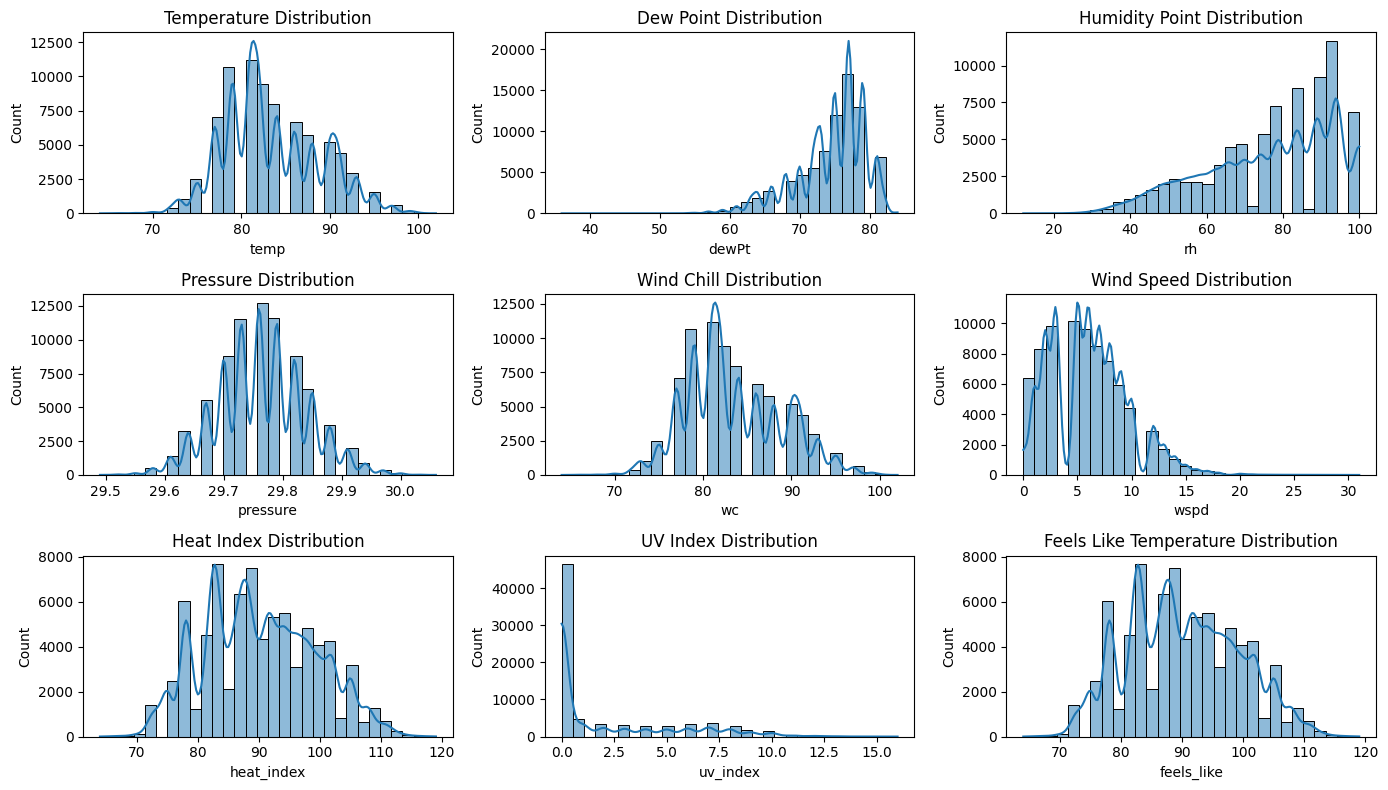

In [7]:
# Histogram for key numerical variables
plt.figure(figsize=(14, 8))

plt.subplot(3, 3, 1)
sns.histplot(data7_original['temp'], bins=30, kde=True)
plt.title('Temperature Distribution')

plt.subplot(3, 3, 2)
sns.histplot(data7_original['dewPt'], bins=30, kde=True)
plt.title('Dew Point Distribution')

plt.subplot(3, 3, 3)
sns.histplot(data7_original['rh'], bins=30, kde=True)
plt.title('Humidity Point Distribution')

plt.subplot(3, 3, 4)
sns.histplot(data7_original['pressure'], bins=30, kde=True)
plt.title('Pressure Distribution')

plt.subplot(3, 3, 5)
sns.histplot(data7_original['wc'], bins=30, kde=True)
plt.title('Wind Chill Distribution')

plt.subplot(3, 3, 6)
sns.histplot(data7_original['wspd'], bins=30, kde=True)
plt.title('Wind Speed Distribution')

plt.subplot(3, 3, 7)
sns.histplot(data7_original['heat_index'], bins=30, kde=True)
plt.title('Heat Index Distribution')

plt.subplot(3, 3, 8)
sns.histplot(data7_original['uv_index'], bins=30, kde=True)
plt.title('UV Index Distribution')

plt.subplot(3, 3, 9)
sns.histplot(data7_original['feels_like'], bins=30, kde=True)
plt.title('Feels Like Temperature Distribution')

plt.tight_layout()
plt.show()


**Phân tích xu hướng thời gian:**

1. **Nhiệt độ**: Có sự biến động rõ rệt theo thời gian, với các đỉnh và đáy biểu thị sự thay đổi nhiệt độ ngày và đêm.
2. **Độ ẩm tương đối**: Cũng có xu hướng biến đổi theo thời gian, thường tỷ lệ nghịch với nhiệt độ.
3. **Áp suất khí quyển**: Thay đổi không đáng kể theo thời gian, chủ yếu dao động trong một khoảng nhỏ.
4. **Tốc độ gió**: Biến động theo thời gian, có những khoảng thời gian gió mạnh và yếu khác nhau.
5. **Nhiệt độ điểm sương**: Có xu hướng tương tự với nhiệt độ, phản ánh độ ẩm trong không khí.

**Ma trận tương quan:**

- **Nhiệt độ và Độ ẩm**: Tương quan nghịch mạnh (-0.75), cho thấy khi nhiệt độ tăng, độ ẩm giảm và ngược lại.
- **Nhiệt độ và Áp suất khí quyển**: Tương quan nghịch nhẹ (-0.21).
- **Nhiệt độ và Tốc độ gió**: Tương quan dương (0.30), cho thấy khi nhiệt độ tăng, tốc độ gió cũng có xu hướng tăng.
- **Độ ẩm và Nhiệt độ điểm sương**: Tương quan dương mạnh (0.69), phản ánh độ ẩm cao khi nhiệt độ điểm sương cao.
- **Áp suất khí quyển và Nhiệt độ điểm sương**: Tương quan nghịch (-0.37).

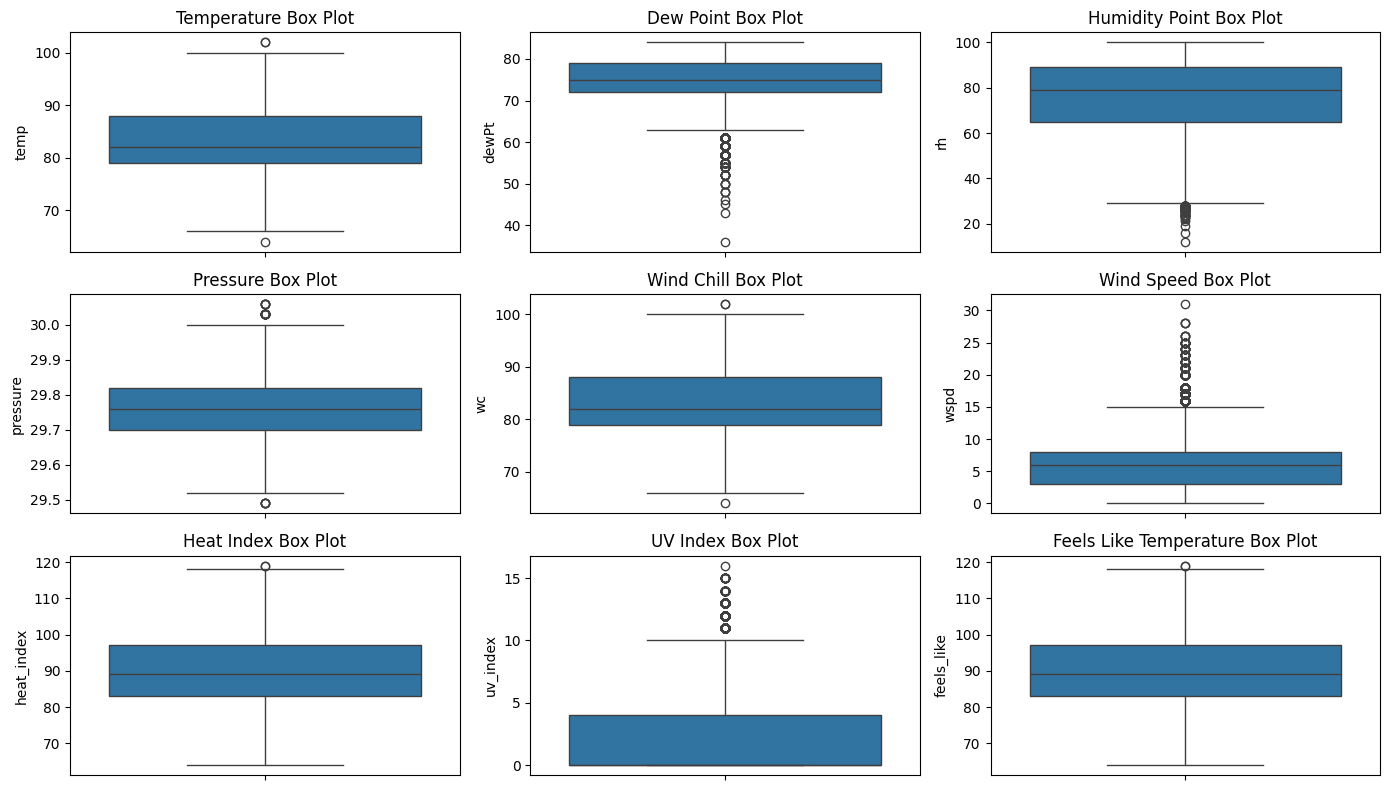

In [19]:
# Box plots for key numerical variables
plt.figure(figsize=(14, 8))

plt.subplot(3, 3, 1)
sns.boxplot(data7_original['temp'])
plt.title('Temperature Box Plot')

plt.subplot(3, 3, 2)
sns.boxplot(data7_original['dewPt'])
plt.title('Dew Point Box Plot')

plt.subplot(3, 3, 3)
sns.boxplot(data7_original['rh'])
plt.title('Humidity Point Box Plot')

plt.subplot(3, 3, 4)
sns.boxplot(data7_original['pressure'])
plt.title('Pressure Box Plot')

plt.subplot(3, 3, 5)
sns.boxplot(data7_original['wc'])
plt.title('Wind Chill Box Plot')

plt.subplot(3, 3, 6)
sns.boxplot(data7_original['wspd'])
plt.title('Wind Speed Box Plot')

plt.subplot(3, 3, 7)
sns.boxplot(data7_original['heat_index'])
plt.title('Heat Index Box Plot')

plt.subplot(3, 3, 8)
sns.boxplot(data7_original['uv_index'])
plt.title('UV Index Box Plot')

plt.subplot(3, 3, 9)
sns.boxplot(data7_original['feels_like'])
plt.title('Feels Like Temperature Box Plot')

plt.tight_layout()
plt.show()


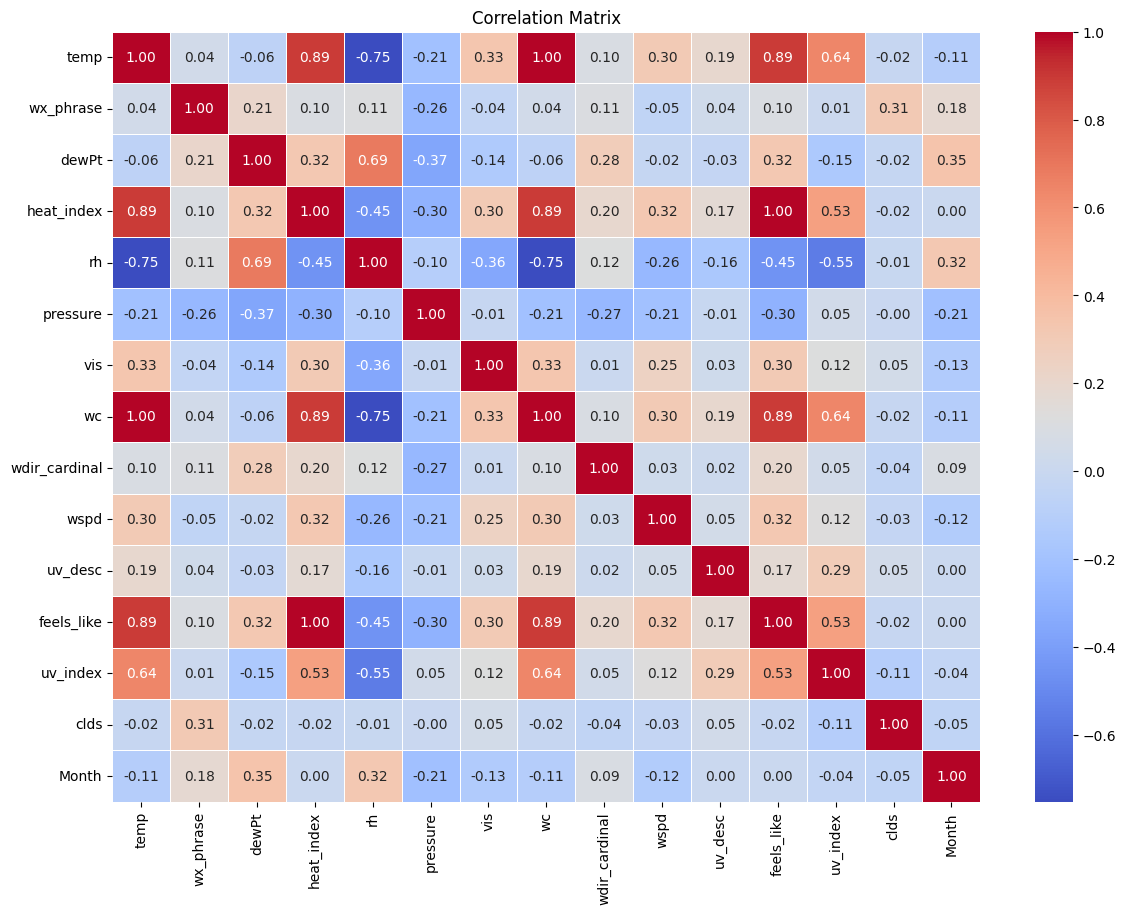

,temp,wx_phrase,dewPt,heat_index,rh,pressure,vis,wc,wdir_cardinal,wspd,uv_desc,feels_like,uv_index,clds,Month
temp,1.000000,0.043678,-0.063077,0.891379,-0.751776,-0.211096,0.329550,1.000000,0.096444,0.302395,0.193973,0.891379,0.643462,-0.019072,-0.112706
wx_phrase,0.043678,1.000000,0.211706,0.101015,0.114070,-0.259628,-0.038645,0.043678,0.105178,-0.053783,0.039614,0.101015,0.010841,0.312643,0.183391
dewPt,-0.063077,0.211706,1.000000,0.317546,0.688515,-0.367140,-0.139446,-0.063077,0.284378,-0.022205,-0.030346,0.317546,-0.154826,-0.024234,0.346533
heat_index,0.891379,0.101015,0.317546,1.000000,-0.454282,-0.295607,0.303901,0.891379,0.196769,0.317762,0.171745,1.000000,0.534086,-0.015401,0.003646
rh,-0.751776,0.114070,0.688515,-0.454282,1.000000,-0.104311,-0.357702,-0.751776,0.119833,-0.259327,-0.161343,-0.454282,-0.553771,-0.008277,0.316724
pressure,-0.211096,-0.259628,-0.367140,-0.295607,-0.104311,1.000000,-0.012785,-0.211096,-0.265085,-0.210076,-0.008022,-0.295607,0.048004,-0.001737,-0.214271
vis,0.329550,-0.038645,-0.139446,0.303901,-0.357702,-0.012785,1.000000,0.329550,0.005369,0.245980,0.030839,0.303901,0.122090,0.051467,-0.131119
wc,1.000000,0.043678,-0.063077,0.891379,-0.751776,-0.211096,0.329550,1.000000,0.096444,0.302395,0.193973,0.891379,0.643462,-0.019072,-0.112706
wdir_cardinal,0.096444,0.105178,0.284378,0.196769,0.119833,-0.265085,0.005369,0.096444,1.000000,0.028735,0.019565,0.196769,0.046232,-0.041579,0.093324
wspd,0.302395,-0.053783,-0.022205,0.317762,-0.259327,-0.210076,0.245980,0.302395,0.028735,1.000000,0.051227,0.317762,0.124165,-0.029246,-0.122487


In [21]:
# Correlation matrix
correlation_matrix_corrected = data7[data7.columns[1:]].corr()

# Plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_corrected, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix_corrected



In [22]:
# Convert the DateTime column to datetime format
data7['DateTime'] = pd.to_datetime(data7['DateTime'])

# Extract month and add as a new column
data7['Month'] = data7['DateTime'].dt.month
data7['Year'] = data7['DateTime'].dt.year
# Display the updated dataset with the Month column
data7


,DateTime,temp,wx_phrase,dewPt,heat_index,rh,pressure,vis,wc,wdir_cardinal,wspd,uv_desc,feels_like,uv_index,clds,Month,Year
0,2020-01-01 00:00:00,79.0,2,66.0,81.0,65.0,29.91,6.0,79.0,5,5.0,2,81.0,0.0,2,1,2020
1,2020-01-01 00:30:00,79.0,2,68.0,81.0,69.0,29.91,6.0,79.0,14,5.0,2,81.0,0.0,2,1,2020
2,2020-01-01 01:00:00,79.0,2,70.0,81.0,74.0,29.91,6.0,79.0,4,6.0,2,81.0,0.0,2,1,2020
3,2020-01-01 01:30:00,79.0,2,70.0,81.0,74.0,29.91,4.0,79.0,6,6.0,2,81.0,0.0,2,1,2020
4,2020-01-01 02:00:00,77.0,2,68.0,79.0,74.0,29.91,4.0,77.0,6,6.0,2,79.0,0.0,2,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77745,2024-06-17 21:30:00,84.0,18,81.0,98.0,89.0,29.76,6.0,84.0,13,9.0,2,98.0,0.0,4,6,2024
77746,2024-06-17 22:00:00,84.0,18,81.0,98.0,89.0,29.76,6.0,84.0,13,8.0,2,98.0,0.0,4,6,2024
77747,2024-06-17 22:30:00,84.0,18,81.0,98.0,89.0,29.76,6.0,84.0,17,8.0,2,98.0,0.0,4,6,2024
77748,2024-06-17 23:00:00,82.0,18,81.0,94.0,94.0,29.76,6.0,82.0,13,8.0,2,94.0,0.0,4,6,2024


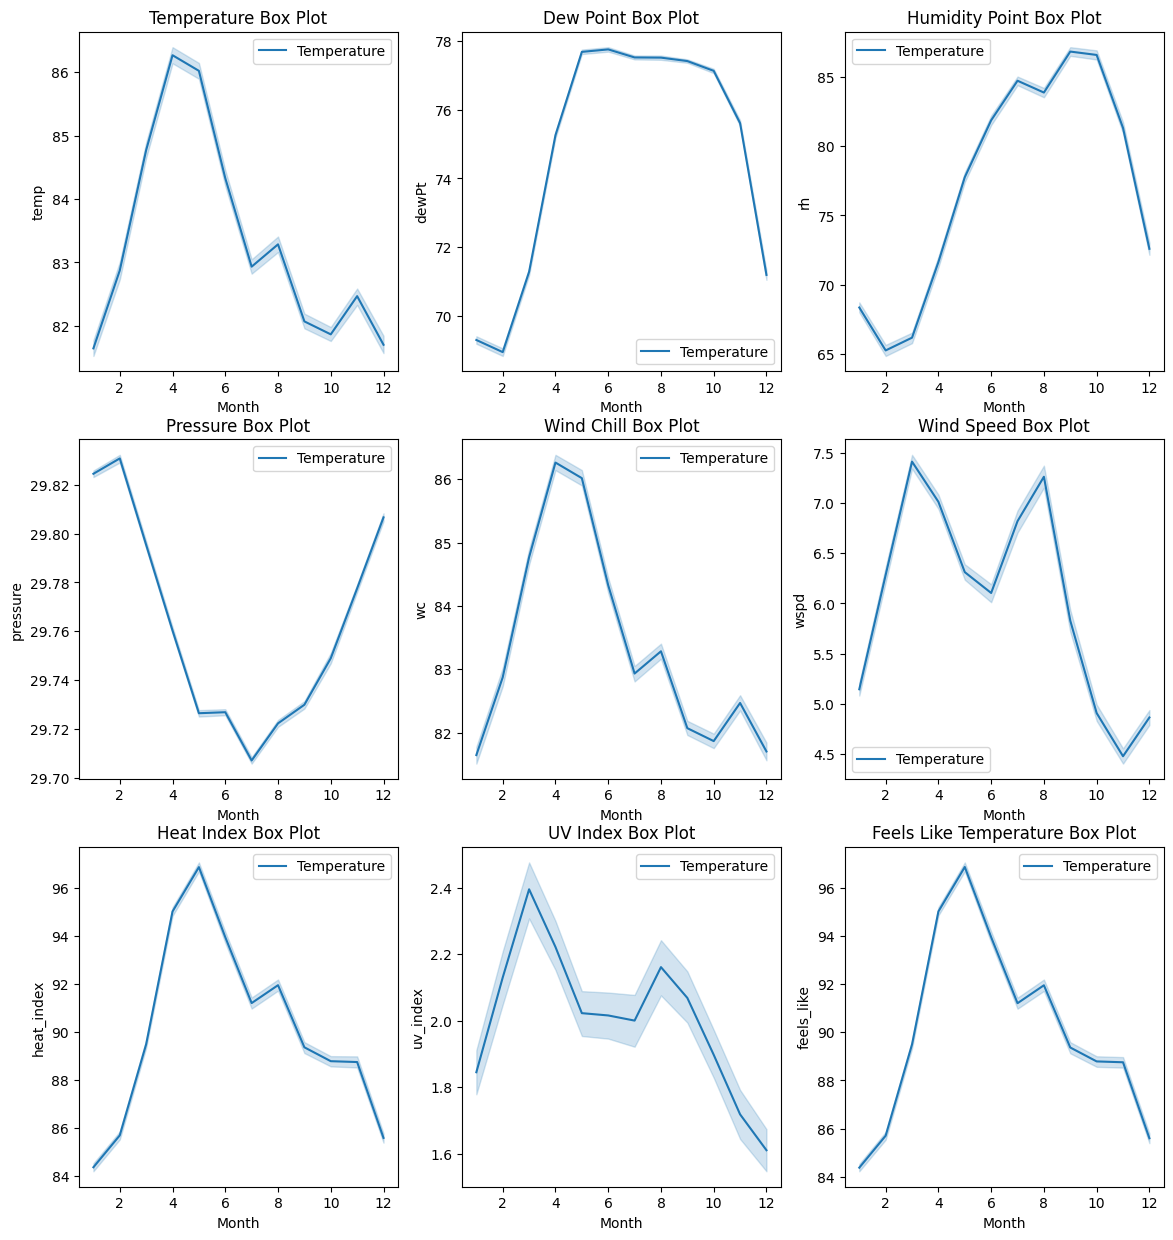

In [28]:
# Group by month and calculate summary statistics
monthly_summary = data7.groupby('Month').describe()

# Visualize trends over the months
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 15))

plt.subplot(3, 3, 1)
sns.lineplot(data=data7, x='Month', y='temp', label='Temperature')
plt.title('Temperature Box Plot')

plt.subplot(3, 3, 2)
sns.lineplot(data=data7, x='Month', y='dewPt', label='Temperature')
plt.title('Dew Point Box Plot')

plt.subplot(3, 3, 3)
sns.lineplot(data=data7, x='Month', y='rh', label='Temperature')
plt.title('Humidity Point Box Plot')

plt.subplot(3, 3, 4)
sns.lineplot(data=data7, x='Month', y='pressure', label='Temperature')
plt.title('Pressure Box Plot')

plt.subplot(3, 3, 5)
sns.lineplot(data=data7, x='Month', y='wc', label='Temperature')
plt.title('Wind Chill Box Plot')

plt.subplot(3, 3, 6)
sns.lineplot(data=data7, x='Month', y='wspd', label='Temperature')
plt.title('Wind Speed Box Plot')

plt.subplot(3, 3, 7)
sns.lineplot(data=data7, x='Month', y='heat_index', label='Temperature')
plt.title('Heat Index Box Plot')

plt.subplot(3, 3, 8)
sns.lineplot(data=data7, x='Month', y='uv_index', label='Temperature')
plt.title('UV Index Box Plot')

plt.subplot(3, 3, 9)
sns.lineplot(data=data7, x='Month', y='feels_like', label='Temperature')
plt.title('Feels Like Temperature Box Plot')

plt.legend()
plt.show()

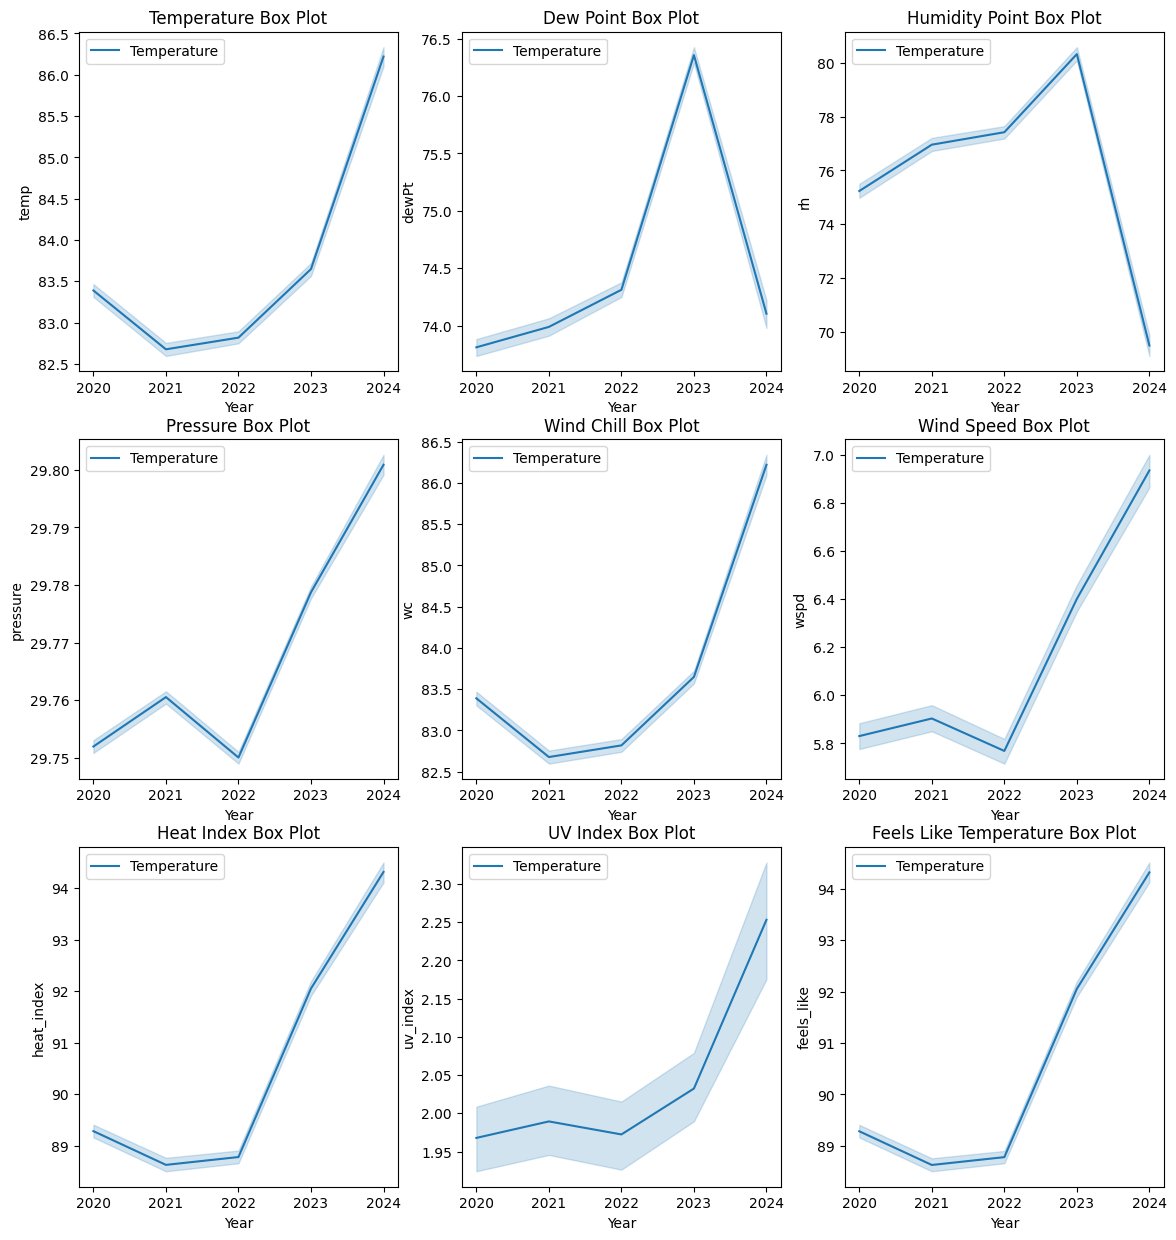

In [29]:
# Group by years and calculate summary statistics
monthly_summary = data7.groupby('Year').describe()

# Visualize trends over the years
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 15))

plt.subplot(3, 3, 1)
sns.lineplot(data=data7, x='Year', y='temp', label='Temperature')
plt.title('Temperature Box Plot')

plt.subplot(3, 3, 2)
sns.lineplot(data=data7, x='Year', y='dewPt', label='Temperature')
plt.title('Dew Point Box Plot')

plt.subplot(3, 3, 3)
sns.lineplot(data=data7, x='Year', y='rh', label='Temperature')
plt.title('Humidity Point Box Plot')

plt.subplot(3, 3, 4)
sns.lineplot(data=data7, x='Year', y='pressure', label='Temperature')
plt.title('Pressure Box Plot')

plt.subplot(3, 3, 5)
sns.lineplot(data=data7, x='Year', y='wc', label='Temperature')
plt.title('Wind Chill Box Plot')

plt.subplot(3, 3, 6)
sns.lineplot(data=data7, x='Year', y='wspd', label='Temperature')
plt.title('Wind Speed Box Plot')

plt.subplot(3, 3, 7)
sns.lineplot(data=data7, x='Year', y='heat_index', label='Temperature')
plt.title('Heat Index Box Plot')

plt.subplot(3, 3, 8)
sns.lineplot(data=data7, x='Year', y='uv_index', label='Temperature')
plt.title('UV Index Box Plot')

plt.subplot(3, 3, 9)
sns.lineplot(data=data7, x='Year', y='feels_like', label='Temperature')
plt.title('Feels Like Temperature Box Plot')

plt.legend()
plt.show()

**Hầu hết các chỉ số đều có xu hướng tăng theo năm**
***=> Thời tiết ngày càng khắc nghiệt***


